In [71]:
!pip install rembg Pillow opencv-python numpy requests

In [68]:
from PIL import Image
import PIL
from rembg import remove
import base64
from io import BytesIO
import requests
import subprocess
import cv2
import numpy as np

# Remove Background 

In [48]:

input_path = 'dog.jpg' # '/home/jupyter/Image_camera.png' # input image path
output_without_bg = 'no_bg_dog.jpg' # '/home/jupyter/output_camera.png' # output image path

input = Image.open(input_path) # load image
output = remove(input) # remove background
output = output.convert('RGB')
output.save(output_without_bg) # save image

# Create a mask

In [49]:
masked_image_path = 'masked_dog.jpg'
img = PIL.Image.open(output_without_bg) # Reading the image
img_size = img.size
output = remove(img, only_mask =True)
output = output.resize(img_size)
output.save(masked_image_path)

# Create inverted mask

In [50]:
# Load the mask image
inverted_mask_path = "inverted_mask.png"
mask_image = cv2.imread(masked_image_path, cv2.IMREAD_GRAYSCALE)
inverted_mask = np.bitwise_not(mask_image)
cv2.imwrite(inverted_mask_path, inverted_mask)

True

# Encoding Image to String 

In [51]:
# Load and encode your input 
with open(output_without_bg, "rb") as inp_img_file:
    encoded_inp_img = base64.b64encode(inp_img_file.read()).decode("utf-8")

with open(inverted_mask_path, "rb") as mask_img_file:
    encoded_mask_img = base64.b64encode(mask_img_file.read()).decode("utf-8")

# Request Payload

In [69]:
# Config
PROJECT_ID = "aakash-test-env"
EDIT_IMAGE_COUNT = 3  # Adjust as needed
MODE = "backgroundEditing"  # Replace with your mode

# Construct the API endpoint URL
endpoint = f"https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/imagegeneration:predict".format(PROJECT_ID)

# Construct the request payload
request_payload = {
    "instances": [
        {
            "prompt": "beach with clear skies and blue water",
            "image": {
                "bytesBase64Encoded": encoded_inp_img
            },
            "mask": {
                "image": {
                    "bytesBase64Encoded": encoded_mask_img
                }
            }
        }
    ],
    "parameters": {
        "sampleCount": EDIT_IMAGE_COUNT,
        "mode": MODE
    }
}

# API call

200


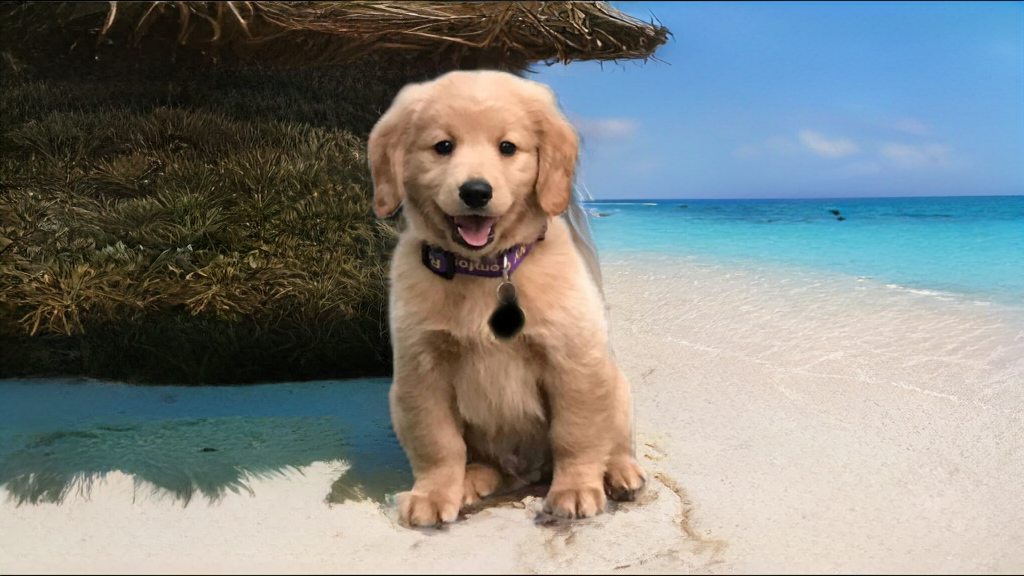

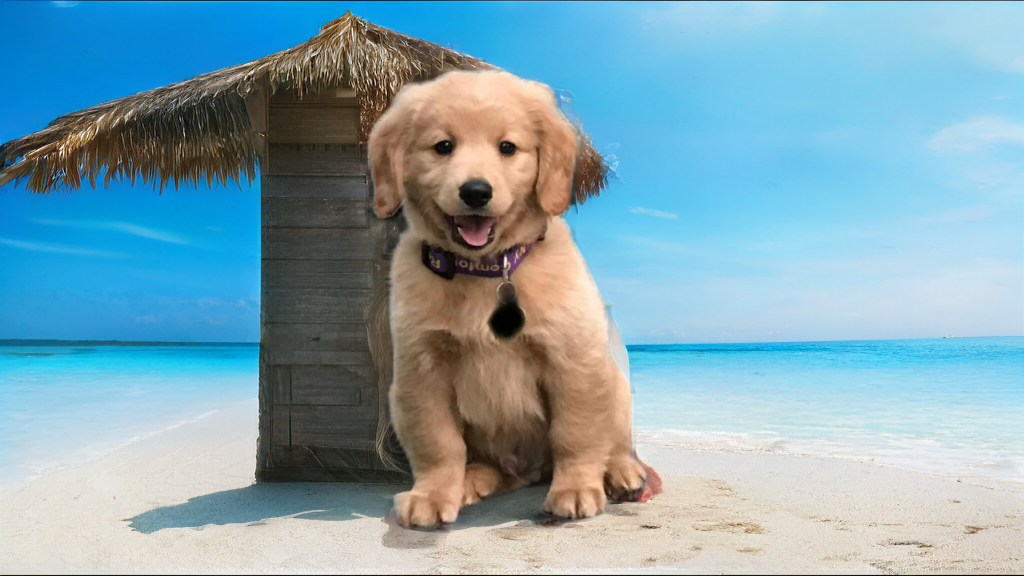

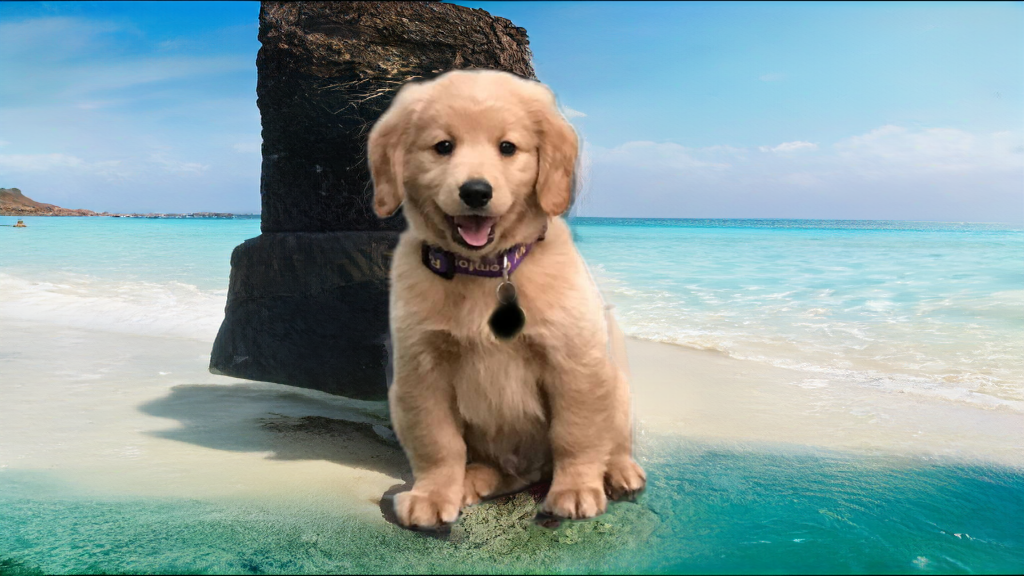

In [70]:
token = subprocess.run(
        "gcloud auth print-access-token", shell=True, capture_output=True, text=True
    ).stdout.strip()

headers = {
        "Authorization": "Bearer " + token,
        "Content-Type": "application/json; charset=utf-8",
    }

response = requests.post(
    endpoint, 
    json=request_payload, 
    headers=headers)
    
print(response.status_code)

res = response.json()

from io import BytesIO
# Process the response
if response.status_code == 200:
    result = response.json()
    # Process the generated images in the 'result' variable
    generated_images = result.get("predictions", [])
    for idx, image_data in enumerate(generated_images):
        # Process each generated image data here
        # print(f"Generated Image {idx + 1}: {image_data}")
        img_bytes = base64.b64decode(image_data["bytesBase64Encoded"])
        img = Image.open(BytesIO(img_bytes))
        img.save("{}_pic.png".format(idx))
        display(img)
        
else:
    print(f"Request failed with status code: {response.status_code}")
    print(response.text)